In [1]:
''' Domain Libraries:
 depending on what to work on text, audio, vision, recommendation, look nto pytorch's existing data loading
 functions
'''



" Domain Libraries:\n depending on what to work on text, audio, vision, recommendation, look nto pytorch's existing data loading\n functions\n"

In [2]:
import torch
from torch import nn

In [3]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
from os import mkdir
#get data
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

#if the image folder doesnt exist, download it and prepare it
if image_path.is_dir():
    print(f'{image_path} directory already exists... skipping download')
else:
    print(f'{image_path} does not exist, creating one....')
    image_path.mkdir(parents=True, exist_ok=True)

#download pizza, steak and sushi
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("dowanloading pizza, steak, sushi data...")
  f.write(request.content)

#unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unpacking this shit....")
  zip_ref.extractall(image_path)








data/pizza_steak_sushi does not exist, creating one....
dowanloading pizza, steak, sushi data...
unpacking this shit....


In [5]:
#2 Becoming one with the data
import os
def walk_through_dir(dir_path):
  ''' walks through dir_path returning its contents'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ')

In [6]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi 
there are 3 directories and 0 images in data/pizza_steak_sushi/test 
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
there are 3 directories and 0 images in data/pizza_steak_sushi/train 
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 


In [7]:
#setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir ,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/steak/100274.jpg
steak
Random image path: data/pizza_steak_sushi/test/steak/100274.jpg
Image class: steak
Image height: 384
image width: 512


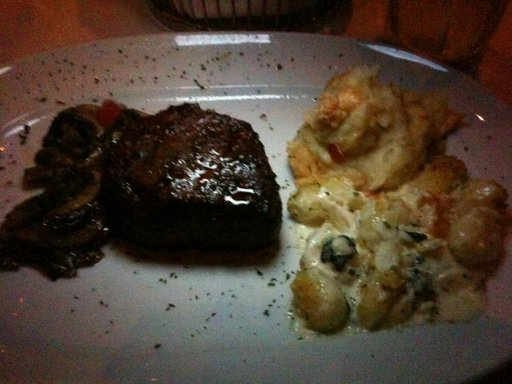

In [8]:
#visualizing and image
'''
Lets write some code to:
1. Get all of the image paths
2. pich a random image path using random.choice
3. get the image class name using 'pathlib.Path.parent.stem'
4.Since we are working with images, lets open the image with pythons PIL
5. we will show the image and print metadata
'''

import random
from PIL import Image

#1. get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

#2. pick a random image path
random_image_path = random.choice(image_path_list)

print(random_image_path)

#3.  get the image class from path name( the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

#5. print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'image width: {img.width}')
img


(-0.5, 511.5, 383.5, -0.5)

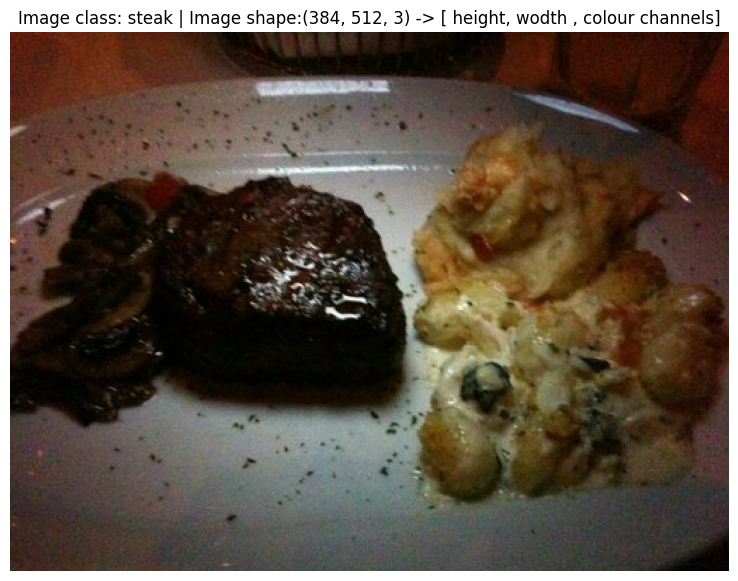

In [9]:
#try to visaulize the image in matplotlib

import numpy as np
import matplotlib.pyplot as plt

#turn the image into an array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape:{img_as_array.shape} -> [ height, wodth , colour channels]')
plt.axis(False)

array([[[94, 31, 16],
        [96, 33, 18],
        [97, 34, 17],
        ...,
        [48, 10,  0],
        [56, 14,  2],
        [59, 17,  5]],

       [[94, 31, 16],
        [95, 32, 17],
        [92, 29, 12],
        ...,
        [53, 13,  3],
        [61, 19,  7],
        [64, 22, 10]],

       [[94, 28, 14],
        [96, 30, 16],
        [95, 29, 15],
        ...,
        [57, 17,  7],
        [64, 22, 10],
        [66, 24, 10]],

       ...,

       [[55, 39, 26],
        [59, 43, 30],
        [64, 48, 35],
        ...,
        [ 8,  3,  0],
        [ 8,  3,  0],
        [ 9,  4,  1]],

       [[57, 43, 30],
        [66, 52, 39],
        [65, 51, 38],
        ...,
        [ 6,  1,  0],
        [ 7,  2,  0],
        [ 7,  2,  0]],

       [[56, 42, 29],
        [64, 50, 37],
        [57, 43, 30],
        ...,
        [ 9,  4,  1],
        [ 9,  4,  1],
        [10,  5,  2]]], dtype=uint8)
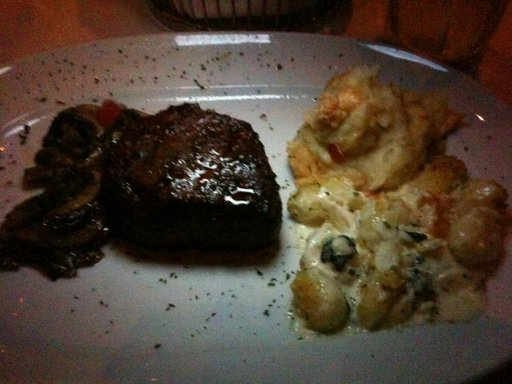

In [10]:
img_as_array

In [11]:
## Transforming data

''' Before we can use our imagedata with pytorch:
1. turn target data into tensors
2. Turn it into torch.utils.data.Dataset and susequently a torch.utils.data.DataLoader
'''

' Before we can use our imagedata with pytorch:\n1. turn target data into tensors\n2. Turn it into torch.utils.data.Dataset and susequently a torch.utils.data.DataLoader\n'

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [13]:
#Transforming data with torchvision.transforms

#write a transform for image
data_transform = transforms.Compose([
    #resize out images to 64X64
    transforms.Resize(size = (64, 64)),

    #flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    #turn the image into a torch.Tensor
    transforms.ToTensor()
])


In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

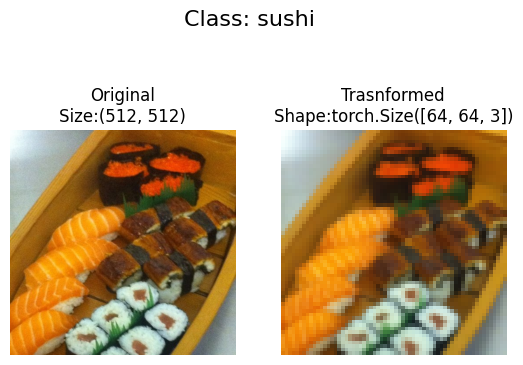

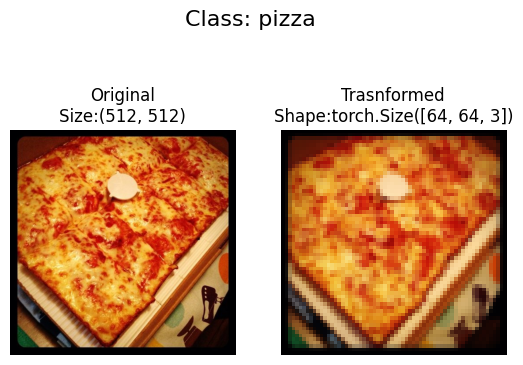

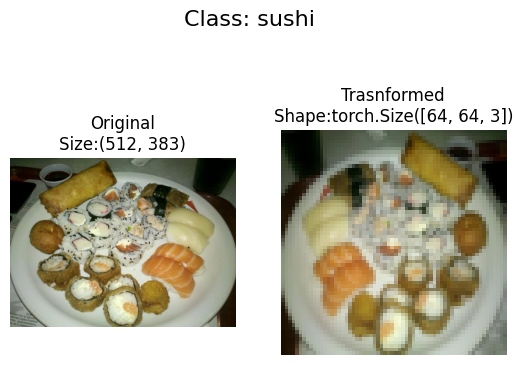

In [15]:
def plot_transformed_images(image_paths: list , transform , n=3 , seed = None):
  ''' Selects random images from a path of images and loads/transforms them then
      plots the original vs the transformed version
  '''
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths , k=n )
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig , ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize:{f.size}')
      ax[0].axis(False)

      #transform and plot target image
      transformed_image = transform(f).permute(1,2,0) #we need to change shape for mat plotlib (C,H ,W)->(H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Trasnformed\nShape:{transformed_image.shape}')
      ax[1].axis(False)

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        n=3,
                        seed = None)




In [16]:
# 4. Option1: Loading image data using 'ImageFolder'
''' we can load image classification data using torchvision.datasets.ImageFolder
'''
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root = test_dir, transform = data_transform)

train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
#get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
#get calss names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
len(train_data), len(test_data)

(225, 75)

In [20]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [21]:
#index on the train_data dataset to get a single image and label
img , label = train_data[0][0], train_data[0][1]
print(f'Image Tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label:{label}')
print(f'Image class:{class_names[label]}')
print(f'Label datatype: {type(label)}')

Image Tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [22]:
label

0

Original shape:torch.Size([3, 64, 64]) ->[colour channels, height, width]
Image permute:torch.Size([64, 64, 3])->[height, width, colour channels]


Text(0.5, 1.0, 'pizza')

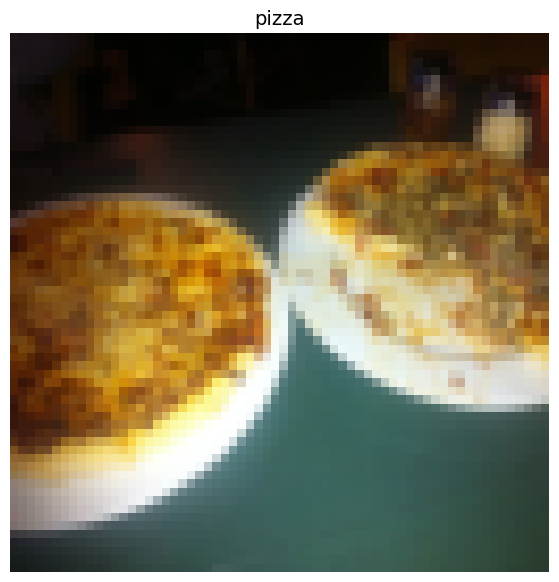

In [23]:
#rearrange the ordfer dimensions
img_permute = img.permute(1,2,0)

#print out diffreent shapes
print(f'Original shape:{img.shape} ->[colour channels, height, width]')
print(f'Image permute:{img_permute.shape}->[height, width, colour channels]')

#plot teh image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize= 14)

In [24]:
import os
os.cpu_count()

2

In [25]:
#turn loaded images into data loaders
''' a dataloader is going to help us turn our datasets into iterables adn we can customize the batch_size
so our model can see batch size images at a time
'''
#turn train and test datasets into dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=1,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a9740613c40>,
 <torch.utils.data.dataloader.DataLoader at 0x7a9740613880>)

In [26]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [27]:
img , label = next(iter(train_dataloader))

#batch size will now be 1, you can change the batch size if you like
print(f'Image shape:{img.shape}->[batch_size,colour_channels,height,width]')
print(f'Label shape:{label.shape}')


Image shape:torch.Size([1, 3, 64, 64])->[batch_size,colour_channels,height,width]
Label shape:torch.Size([1])


In [28]:
# OPTION 2 : loading image data with a custom dataset
#1.Want to be able to load images from a file
#2. want to be able to get calss names form the dataset
#3. want to be able to get classes as dictionary from the dataset
''' PROS:
* Can create a datasetout of almost anything
* Non liumited to pytorch pre built dataset functions

CONS:
* hard to get working
* using custom dataset results in writing more code

All custom datasets in pytorch often subclass: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
'''



' PROS:\n* Can create a datasetout of almost anything\n* Non liumited to pytorch pre built dataset functions\n\nCONS:\n* hard to get working\n* using custom dataset results in writing more code\n\nAll custom datasets in pytorch often subclass: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset\n'

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [30]:
#instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [31]:
#creating helper function to get class names
''' We want the function to :
1. Get the class names using os.scandir() to traverse a target directory(ideally the directory is in standard image calssiication format )
2. raise an error if teh class names arent found( if this happens, there might be something wrong with trhe directory structure)
3. turn the class names into a dict and a list and return them.
'''

' We want the function to :\n1. Get the class names using os.scandir() to traverse a target directory(ideally the directory is in standard image calssiication format )\n2. raise an error if teh class names arent found( if this happens, there might be something wrong with trhe directory structure)\n3. turn the class names into a dict and a list and return them.\n'

In [32]:
#setup the path directory for target directory
target_directory = train_dir
print(f'Target dir: {target_directory}')

#get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [34]:
def find_classes(directory:str)-> Tuple[List[str], Dict[str,int]]:
  ''' Finds the class folder names in a target directory'''
  #1.Get the class folder names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if the class names could not be found
  if not classes:
    raise FileNotFoundError(f'Couldnt find any classes in {directory}....please check file structure')

  #3. Create a dictionary of index labels( computers prefer them juicy numeros)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [35]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [36]:
 #create a custom dataset to replicate 'ImageFolder'
''' to create our own custom dataset, we want to:
1.Sublass'torch.utils.data.dataset'
2. init our subclass with a target directory(the directorywe'd like to get data from) as well as a transform if we'd like to transform ouyr data
3. create sevaral attributes:
  * paths - paths of our imaegs
  * transform - the transform we'd like to use
  * classes - a list of target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. create a fxn to load_images(), this functrion will open images
5. overwrite the __len()__ method to return the length of our dataset
6. overwrite the__getitem()__ method to return a given sample when passed an index
'''


" to create our own custom dataset, we want to:\n1.Sublass'torch.utils.data.dataset'\n2. init our subclass with a target directory(the directorywe'd like to get data from) as well as a transform if we'd like to transform ouyr data\n3. create sevaral attributes:\n * paths - paths of our imaegs\n * transform - the transform we'd like to use\n * classes - a list of target classes\n * class_to_idx - a dict of the target classes mapped to integer labels\n4. create a fxn to load_images(), this functrion will open images\n5. overwrite the __len()__ method to return the length of our dataset\n6. overwrite the__getitem()__ method to return a given sample when passed an index\n"

In [37]:
#write a custom dataset class
from torch.utils.data import Dataset

#1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2.initialize our custom dataset
  def __init__(self, targ_dir: str, transform = None):
    #3.create class attributes
    #get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    #setup transforms
    self.transform = transform
    #create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. create a function to load images
  def load_image(self, index:int)->Image.Image:
    "opens an image via a path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. overwrite __len__()
  def __len__(self) ->int:
    "returns the total number of samples"
    return len(self.paths)

  #6.overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "returns one sample of data, data and label (X,y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name #expects path in form: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    #transform if necessary
    if self.transform:
      return self.transform(img), class_idx #return data, label (X,y)

    else:
      return img, class_idx #untransformed image and label




In [38]:
#create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

In [39]:
#test out imagefoldercustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform = test_transforms)

In [40]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a97406b3f10>,
 <__main__.ImageFolderCustom at 0x7a97406b2f20>)

In [41]:
train_data_custom.paths

[PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2880035.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/443210.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/234626.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2087958.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2825100.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1976160.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath

In [42]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [43]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [44]:
#check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [45]:
#5.3 Create a function to display random images
'''
1. Take in a dataset and a number of parameters sucha as class names and how many images to
visualize
2. to prevent the display getting out of hand, lets cap the number of images to see at 10\
3. set the random seed for reproducibility
4. get a list of random sample indexes from the target dataset
5. setup a matplotlib plot
6. loop through the random sample images and plot then through matplotlib
7. Make sure the dimensions of our images line up with matplotlib(HWC)
'''

'\n1. Take in a dataset and a number of parameters sucha as class names and how many images to\nvisualize\n2. to prevent the display getting out of hand, lets cap the number of images to see at 103. set the random seed for reproducibility\n4. get a list of random sample indexes from the target dataset\n5. setup a matplotlib plot\n6. loop through the random sample images and plot then through matplotlib\n7. Make sure the dimensions of our images line up with matplotlib(HWC)\n'

In [46]:
#Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]= None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  #2. adjust display if n is too high
  if n>10:
    n=10
    display_shape = False
    print(f'For display purposes, n shouldnt be larger than 10, setting it to 10 and removing shape display')

  #3. set the seed
  if seed:
    random.seed(seed)

  #4. Get the random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #5. setup plot
  plt.figure(figsize=(16,8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. adjust tensor dimensions for matplotlib
    targ_image_adjust = targ_image.permute(1,2,0)

    #plot the adjusted samples
    plt.subplot(1,n,i+1) #rows , columns , index(subplot index start from 1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f'Class:{classes[targ_label]}'
      if display_shape:
        title = title + f'\nshape:{targ_image_adjust.shape}'
    plt.title(title)



In [47]:
random_samples_idx = random.sample(range(len(train_data_custom)), k=8)
random_samples_idx

[67, 87, 78, 1, 141, 157, 54, 142]

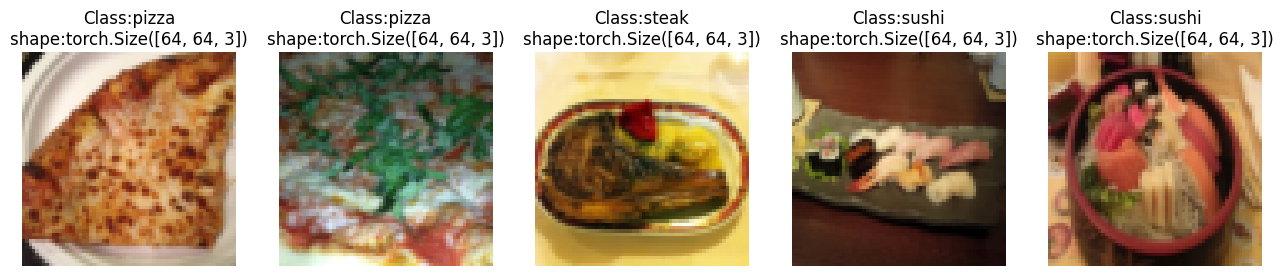

In [48]:
#display random images from the imagefolder created dataset
display_random_images(train_data,
                      n=5,
                      classes = class_names,
                      seed = None)

For display purposes, n shouldnt be larger than 10, setting it to 10 and removing shape display


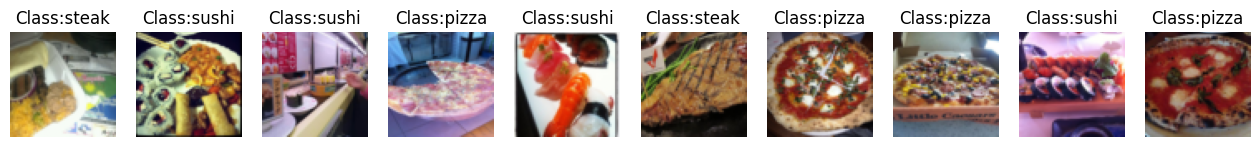

In [49]:
#display random images from the imagefoldercustom dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

In [50]:
#5.4 Turn custom loaded images into dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset= test_data_custom,
                                     batch_size= BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a97402a35e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a97402a0cd0>)

In [51]:
#get image and label from custom dataloader
img_custom , label_custom = next(iter(train_dataloader_custom))

#print out shapes
img_custom.shape , label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [52]:
## Other forms of transforms (data augmentation)
''' DA is the preocess of artificially adding dfiversity to your training data
IN case of image data thi may mean applying various image transformations to training images
this practice hopefully results in a model thats more generalizable to unseen data
Lets take a look at one particular type of data augmentation
'''

' DA is the preocess of artificially adding dfiversity to your training data\nIN case of image data thi may mean applying various image transformations to training images\nthis practice hopefully results in a model thats more generalizable to unseen data\nLets take a look at one particular type of data augmentation\n'

In [53]:
#lets look at trivial augment
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()])

In [54]:
image_path

PosixPath('data/pizza_steak_sushi')

In [55]:
#get all the imaeg paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg')]

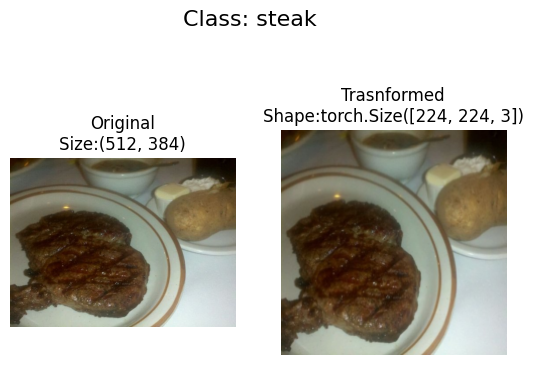

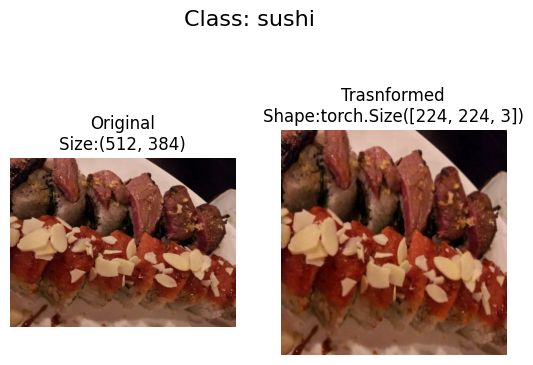

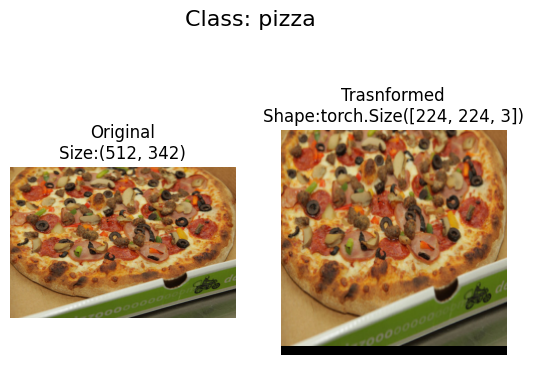

In [56]:
#plot random transformed images
plot_transformed_images(image_paths= image_path_list,
                        transform = train_transforms,
                        n=3)

In [57]:
## Model0 : Tiny VGG withour data augmentation


# 7.1 Creating transforms and loading data for model 0
#create a simple transform
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])


In [58]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

#2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#3. Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create DataLoader
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)

In [59]:
# 7.2 Create TinyVGG model class
class TinyVGG(nn.Module):
  '''
  Model architecture copying TinyVGG from the CNN explainer
  '''
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int) -> None:

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=-0),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2,
                    stride = 2) # default stride value same as kernel_size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,
                  out_features = output_shape)


    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x

    #return self.classifier(self.conv_block_2(self.conv_block_2(x))) # benefits from operator fusion : https://horace.io/brrr_intro.html









In [60]:
#torch.manual_seed(42)

model_0 = TinyVGG(input_shape = 3 , #number of colour channels in our image data
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)

In [61]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [62]:
#try a forwrds pass on a single image( to test the model)
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [63]:
#forward pass
model_0(image_batch.to(device))

tensor([[-0.0101, -0.0009,  0.0105],
        [-0.0101,  0.0011,  0.0141],
        [-0.0053,  0.0005,  0.0183],
        [-0.0061,  0.0064,  0.0186],
        [-0.0025,  0.0015,  0.0173],
        [-0.0089,  0.0003,  0.0142],
        [-0.0099, -0.0039,  0.0153],
        [-0.0030, -0.0043,  0.0152],
        [-0.0076,  0.0011,  0.0162],
        [-0.0117, -0.0015,  0.0148],
        [-0.0098,  0.0014,  0.0169],
        [-0.0081, -0.0004,  0.0150],
        [-0.0091, -0.0020,  0.0113],
        [-0.0060, -0.0006,  0.0134],
        [-0.0045,  0.0029,  0.0154],
        [-0.0080, -0.0035,  0.0111],
        [-0.0094,  0.0012,  0.0164],
        [-0.0086, -0.0020,  0.0174],
        [-0.0081, -0.0028,  0.0160],
        [-0.0106, -0.0026,  0.0115],
        [-0.0084,  0.0006,  0.0169],
        [-0.0092,  0.0012,  0.0131],
        [-0.0085, -0.0013,  0.0121],
        [-0.0060, -0.0047,  0.0171],
        [-0.0093, -0.0020,  0.0125],
        [-0.0088,  0.0030,  0.0152],
        [-0.0100,  0.0022,  0.0185],
 

In [64]:
### Using torchinfo to get idea of shapes going through our model
#Install torchinfo, import if its available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0,input_size =[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [65]:
## 7.5 Create train and test loops functions

#create train_step()
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  #put the model in train mode
  model.train()

  #setup trainloss and train accuracy values
  train_loss, train_acc =0,0

  #loop through data loadder data batches
  for batch, (X,y) in enumerate(dataloader):
    #send data to target device
    X,y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X) #Output model logits

    #2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss +=loss.item()

    #optimizer zero grad
    optimizer.zero_grad()

    #4.Loss backward
    loss.backward()

    #5.Optimizer step
    optimizer.step()

    #calculate acc
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc +=(y_pred_class==y).sum().item()/len(y_pred)

  #adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc



In [66]:
#create test step
def test_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,

               device = device):
  #put the model in eval mode
  model.eval()

  #setup test loss and test acc values
  test_loss, test_acc = 0,0

  #turn on inference mode
  with torch.inference_mode():
    #loop through dataloader batches
    for batch, (X,y) in enumerate(dataloader):
      #send data to target device
      X,y = X.to(device), y.to(device)

      #1. Forward pass
      test_pred_logits = model(X)

      #2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss +=loss.item()

      #calculate the acc
      test_pred_labels = test_pred_logits.argmax(dim = 1)
      test_acc += ((test_pred_labels ==y).sum().item()/ len(test_pred_labels))

  #adjust metrics to get the average loss and acc per batch
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [67]:
#7.6 Creating a train() fnx to combine train_step , test_step
from tqdm.auto import tqdm

#1. Create a train function that takes in various model parameters + optimizer + datalaoders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  #create an empty results dictionary
  results ={"train_loss" :[],
            "train_acc":[],
            "test_loss": [],
            "test_acc": []}

  #Loop through training and testing steps for a numebr of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    #4. Print out whats happening
    print(f'Epoch:{epoch} | Train Loss: {train_loss:.4f} | Train acc:{train_acc:.4f} | Test loss:{test_loss:.4f} | Test Acc: {test_acc:.4f}')

    #5. update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #6. Return the filled results afetr all the epochs
  return results

In [68]:
#train and evaluate model 0
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train Loss: 1.1086 | Train acc:0.2773 | Test loss:1.0913 | Test Acc: 0.5417
Epoch:1 | Train Loss: 1.1012 | Train acc:0.2969 | Test loss:1.1221 | Test Acc: 0.1979
Epoch:2 | Train Loss: 1.1113 | Train acc:0.2930 | Test loss:1.1305 | Test Acc: 0.2604
Epoch:3 | Train Loss: 1.0973 | Train acc:0.3047 | Test loss:1.1166 | Test Acc: 0.2604
Epoch:4 | Train Loss: 1.1053 | Train acc:0.2891 | Test loss:1.1148 | Test Acc: 0.1979
Total training time: 18.172 seconds


In [69]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [70]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

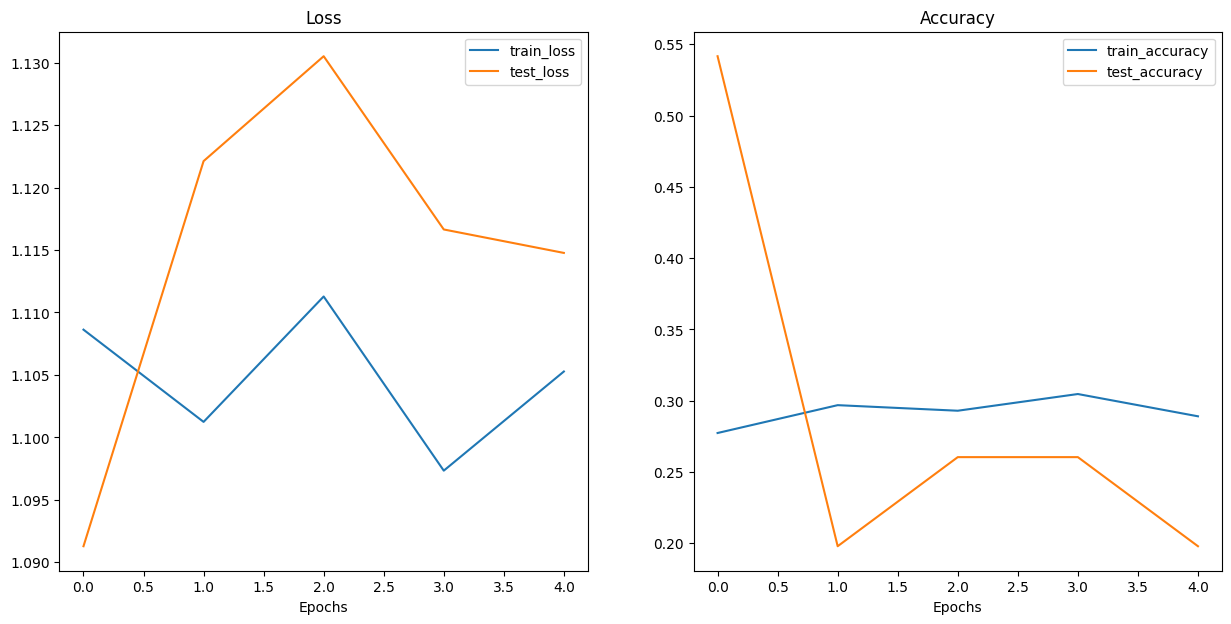

In [71]:
plot_loss_curves(model_0_results)

In [72]:
#What should an ideal loss curve look like
''' We have to avoid overfitting and underfitting our model
if training loss is far lower than test loss then model is overfitting
if training and test loss are not as low as we would like then its underfitting
methods to deal with overfitting and underfitting - https://www.learnpytorch.io/04_pytorch_custom_datasets/#77-train-and-evaluate-model-0
section 8.2
'''


' We have to avoid overfitting and underfitting our model\nif training loss is far lower than test loss then model is overfitting\nif training and test loss are not as low as we would like then its underfitting\nmethods to deal with overfitting and underfitting - https://www.learnpytorch.io/04_pytorch_custom_datasets/#77-train-and-evaluate-model-0\nsection 8.2\n'

In [73]:
#Model 1 : TinyVGG with data augmentation
##9.1 Create transform with data augmentation
# Create training transform with TrivialAugment
train_transform_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [74]:
##9.2 Create train and test Datasets and daatloaders
#turn image folders into datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform = train_transform_trivial)

test_data_simple = datasets.ImageFolder(root = test_dir, transform = test_transform_simple)
train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [75]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7a973f2a2740>,
 <torch.utils.data.dataloader.DataLoader at 0x7a973e566200>)

In [76]:
##9.3 Construct and train model 1
''' This time we'll be using he same model with augmented data'''
#torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape= len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [77]:
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#set the number of epochs
NUM_EPOCHS = 5

#setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_1.parameters(), lr=0.001)

#start the timer
from timeit import default_timer as timer
start_time = timer()

#train model 1
model_1_results = train(model=model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS,
                        device =device)
#end the timer and print hoe long it took
end_time = timer()
print(f'Time taken to train:{end_time-start_time}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train Loss: 1.1069 | Train acc:0.3047 | Test loss:1.0993 | Test Acc: 0.2708
Epoch:1 | Train Loss: 1.1019 | Train acc:0.3203 | Test loss:1.0719 | Test Acc: 0.5417
Epoch:2 | Train Loss: 1.0917 | Train acc:0.4375 | Test loss:1.0846 | Test Acc: 0.4924
Epoch:3 | Train Loss: 1.0915 | Train acc:0.3125 | Test loss:1.0678 | Test Acc: 0.5833
Epoch:4 | Train Loss: 1.0862 | Train acc:0.3594 | Test loss:1.0751 | Test Acc: 0.5331
Time taken to train:16.42899190900002


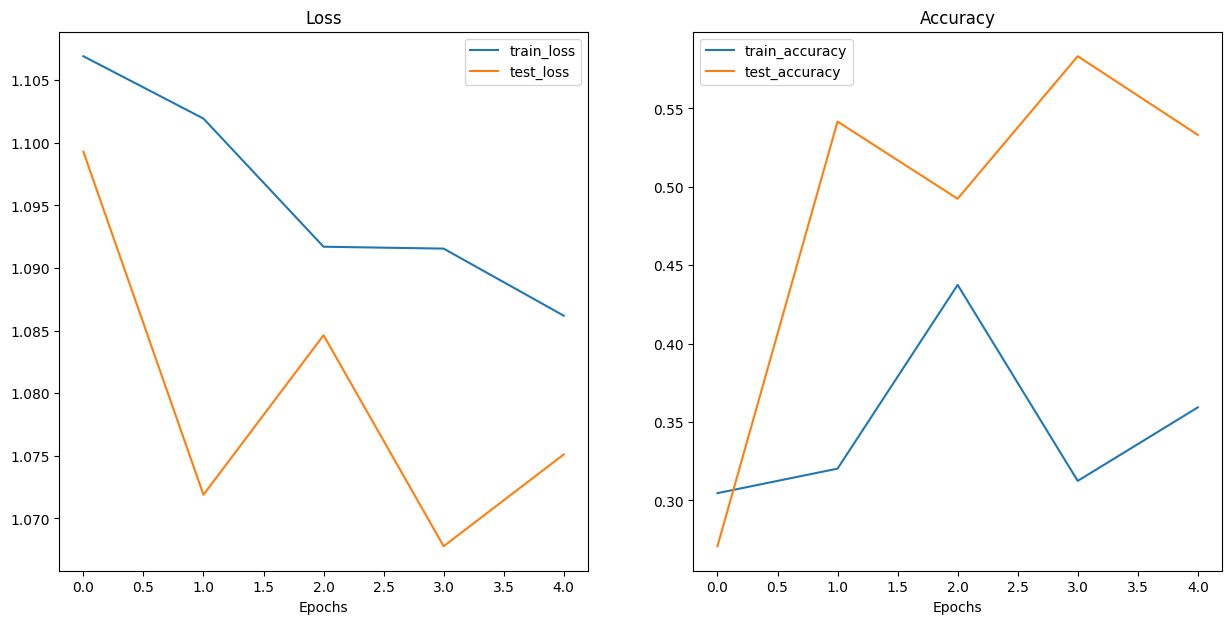

In [78]:
##9.4 PLot the loss curves of model 1
plot_loss_curves(model_1_results)

In [79]:
#compare model results
''' Its important to compare models to each other
Some ways to do this:
    1.Hard Coding
    2.PyTorch+ tensorboard
    3.Weights & Biases
    4.MLFlow
'''

' Its important to compare models to each other\nSome ways to do this:\n    1.Hard Coding\n    2.PyTorch+ tensorboard\n    3.Weights & Biases\n    4.MLFlow\n'

In [80]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.108624,0.277344,1.091292,0.541667
1,1.101243,0.296875,1.122115,0.197917
2,1.111280,0.292969,1.130510,0.260417
3,1.097340,0.304688,1.116644,0.260417
4,1.105275,0.289062,1.114766,0.197917


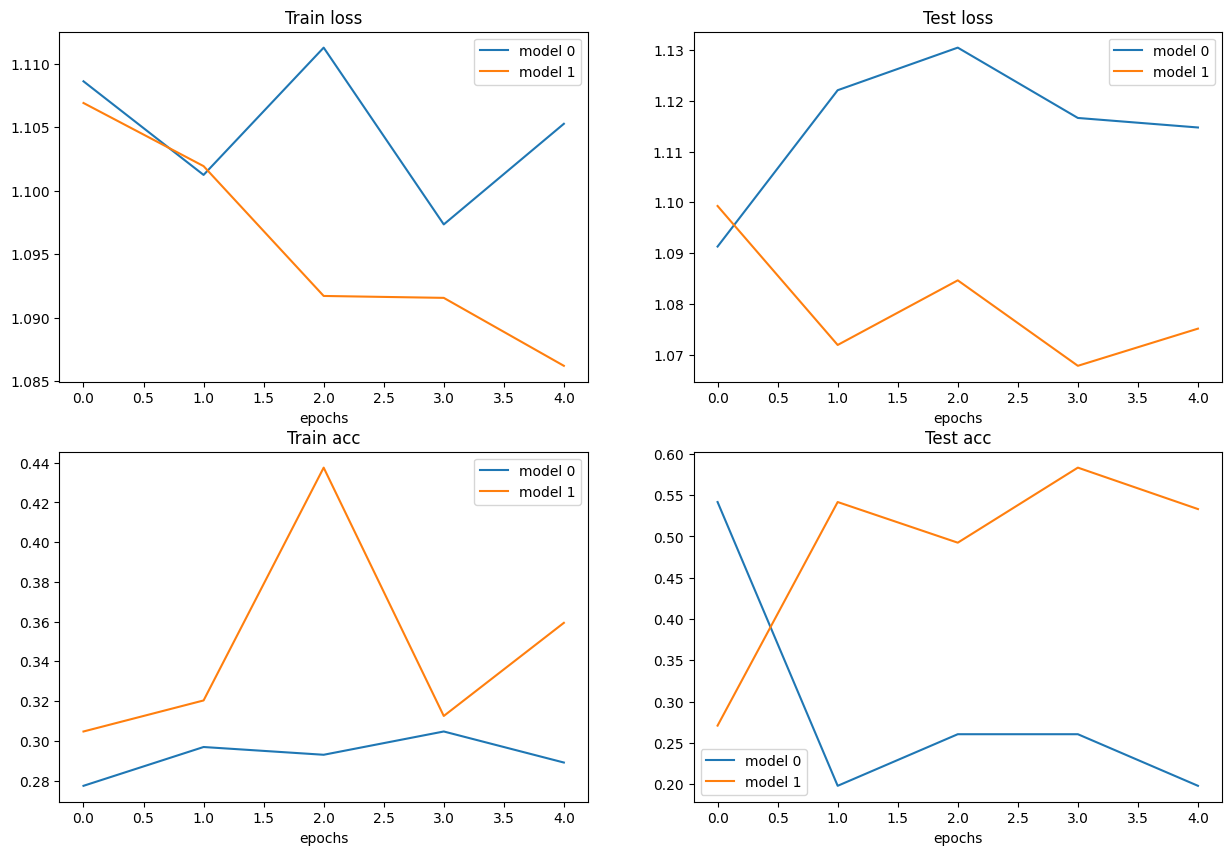

In [81]:
#setup a plot
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

#plot train loss
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"], label="model 0")
plt.plot(epochs, model_1_df["train_loss"], label = 'model 1')
plt.title("Train loss")
plt.xlabel("epochs")
plt.legend()

#plot test loss
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"], label="model 0")
plt.plot(epochs, model_1_df["test_loss"], label = 'model 1')
plt.title("Test loss")
plt.xlabel("epochs")
plt.legend()

#plot train acc
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_acc"], label="model 0")
plt.plot(epochs, model_1_df["train_acc"], label = 'model 1')
plt.title("Train acc")
plt.xlabel("epochs")
plt.legend()

#plot test acc
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"], label="model 0")
plt.plot(epochs, model_1_df["test_acc"], label = 'model 1')
plt.title("Test acc")
plt.xlabel("epochs")
plt.legend()


In [82]:
### making prediction on a custom image

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:

        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")


In [ ]:
##Loading in custom image with pytorch
''' We have to make sure our cutsom image is in the same format as the data our model was trained on
1. in tensor form with dtype float32
2.of shape 64x64
3.on the right device
'''


In [83]:
custom_image_path

PosixPath('data/04-pizza-dad.jpeg')

In [88]:
import torchvision

#read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f'custom image tensor: \n {custom_image_uint8}')
print(f'custom image shape: \n {custom_image_uint8.shape}')
print(f'custom image dtype: \n {custom_image_uint8.dtype}')


custom image tensor: 
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape: 
 torch.Size([3, 4032, 3024])
custom image d

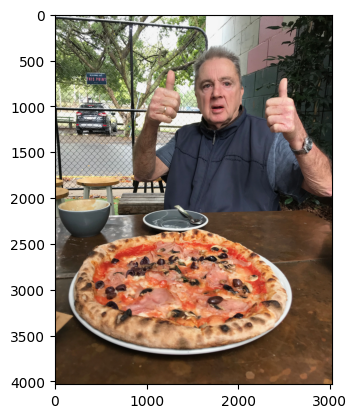

In [87]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [89]:
## Making a prediction on a custom imaeg with a trained pytorch model

# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [90]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

In [94]:
#create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

#trasnform target image
custom_image_transformed = custom_image_transform(custom_image)

#print our shapes
print(f'original: {custom_image.shape}')
print(f'trasnformed:{custom_image_transformed.shape}')

original: torch.Size([3, 4032, 3024])
trasnformed:torch.Size([3, 64, 64])


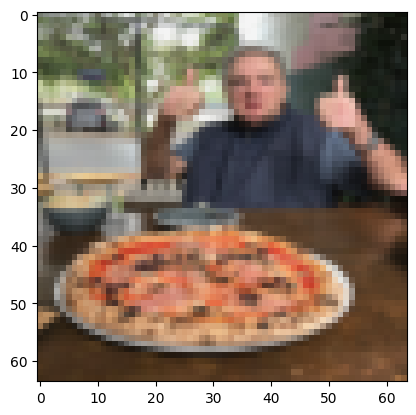

In [96]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [98]:
#this will error, no batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [99]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [100]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [103]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[-0.1157, -0.0199, -0.0052]])

In [104]:
class_names

['pizza', 'steak', 'sushi']

In [105]:
 #convert logits -> pred probs
 custom_image_pred_probs = torch.softmax(custom_image_pred, dim = 1)
 custom_image_pred_probs

tensor([[0.3108, 0.3421, 0.3471]])

In [108]:
#convert pred probs -> pred labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_label

tensor([2])

In [107]:
class_names[custom_image_pred_label]

'sushi'

In [ ]:
###11.3 Putting custom image predictsion together: building a function
''' Ideal outcome:
A function where we pass an image and have our model predict on that image and plot the image + prediction
'''


In [115]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str]= None,
                        transform = None,
                        device = device):
  """Makes a prediction on a target image with a trained model and plots the image and the prediction"""
  #Load in the image
  target_image = custom_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255

  #trasnform if necessary
  if transform:
    target_image = transform(target_image)

  #make sure the model is on the target device
  model.to(device)

  #turn on eval mode
  model.eval()
  with torch.inference_mode():
    #get logits
    target_image_pred_logits = model(target_image.unsqueeze(0).to(device))# add extra dimension( batch dimension)

  #get pred probs
  target_image_pred_probs = torch.softmax(target_image_pred_logits, dim =1)

  #get pred labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs, dim =1)

  #prediction
  if class_names:
    print(f'Prediction: \n {class_names[target_image_pred_labels]} \n')
    title=f'Pred:{class_names[target_image_pred_labels.cpu()]} |Prob: {target_image_pred_probs.max().cpu():.3f}'

  else:
    title =f'Pred:{target_image_pred_labels}| prob:{target_image_pred_probs.max().cpu():.3f}'

  #plot the image
  plt.imshow(target_image.permute(1,2,0))
  plt.title(title)
  plt.axis(False)













Prediction: 
 sushi 



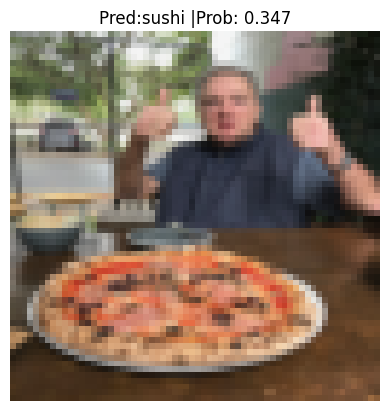

In [118]:
pred_and_plot_image(model = model_1 ,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device)